# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
F

## 1.1 Reading Data

In [2]:

project_data = pd.read_csv('C://Berly/ML/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('C://Berly/ML/Assignments_DonorsChoose_2018/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.head(2)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [7]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories  
0        23             Literacy_Language  
1         1  History_Civics Health_Sports

## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Preprocessing of project_grade_category

In [9]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
# similarly you can preprocess the project grade category also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = decontracted(sentance)
    sent=sent.replace('Grades'," ")

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 148229.83it/s]


In [11]:
#Preprocessing needed for categorial item grade 

grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python



grade_cat_list = []
for i in grade_catogories:
    temp = ""
   #splitting values in the list for getting grades
    for j in i.split(','): # it will split 
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp=temp.rstrip(' ')#
        temp = temp.replace('-','_')
        temp = temp.replace(' ','_')#replacing spaces
        
    grade_cat_list.append(temp.strip())
    

In [12]:
#inserting  processed grade category into project data and dropping old column
project_data['clean_grade'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade  
0  Grades_PreK_2  
1     Grades_6_8

## 1.5 Preprocessing of teacher-prefix

In [13]:
#Preprocessing needed for categorial item grade 

prefix_catogories = list((project_data['teacher_prefix']).values)

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prefix_cat_list = []

for i in prefix_catogories:
    temp = ""
   #splitting values in the list for getting grades
    for j in str(i).split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('nan',' ')#replacing spaces
    prefix_cat_list.append(temp.strip())

In [14]:
#inserting  processed prefix category into project data and dropping old column

project_data['clean_prefix'] = prefix_cat_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  
0  Grades_PreK_2         Mrs.  
1     Grades_6_8          Mr.

## 1.6 Text preprocessing-Project Essay

In [15]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [16]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  \
0  Grades_PreK_2         Mrs.   
1     Grades_6_8          Mr.   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [17]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [18]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [19]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [21]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [22]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [23]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [24]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:50<00:00, 2165.37it/s]


In [25]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='black'> 1.6 Preprocessing of `project_title`</font></h2>

In [26]:
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [27]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('!@#$%^&*()[]{};:,./<>?\|`~-=_+', ' ')
    
    
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 50524.20it/s]


In [28]:
# printing some random titles after text preprocessing.
print(preprocessed_title[0])
print("="*50)
print(preprocessed_title[150])
print("="*50)
print(preprocessed_title[1000])
print("="*50)
print(preprocessed_title[20000])
print("="*50)
print(preprocessed_title[99999])
print("="*50)

educational support english learners home
more movement hokki stools
sailing into super 4th grade year
we need to move it while we input it
inspiring minds enhancing educational experience


In [29]:
#Adding processed columns at place of original columns
project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [30]:
#Adding processed title as clean title in project
project_data['clean_title'] = preprocessed_title

#### Calculating words in essay

In [31]:
#Calculating number of words in essay and adding that to project title

essay_word_count=[]
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

project_data["essay_word_count"] = essay_word_count
project_data.head(2)


Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  \
0  Grades_PreK_2         Mrs.   
1     Grades_6_8          Mr.   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                        clean_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   

                                 clean_title  essay_word_count  
0  educational support english learners home               161  
1           wanted projector hungry learners               109

In [32]:
#Printing data count in project data
print(project_data.count())

#Because of memory constraints linear sampling of whole data and considering 50 k data for analysis
#project_data=project_data.sample(n=50000,replace="False")
#print("*"*50)
#print(project_data.count())

Unnamed: 0                                      109248
id                                              109248
teacher_id                                      109248
school_state                                    109248
project_submitted_datetime                      109248
project_title                                   109248
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
price                                           109248
quantity                                        109248
clean_categories                                109248
clean_subcategories                             109248
clean_grade                                     109248
clean_prefix                                    109248
essay                                           109248
clean_essays                                    109248
clean_title                                     109248
essay_word

In [33]:
#To view count of data set in each class for approved and rejected projects

filtered_negative = project_data.loc[project_data['project_is_approved'] == 0]
filtered_positive = project_data.loc[project_data['project_is_approved'] == 1]
print(filtered_negative.count())
print(filtered_positive.count())

Unnamed: 0                                      16542
id                                              16542
teacher_id                                      16542
school_state                                    16542
project_submitted_datetime                      16542
project_title                                   16542
project_resource_summary                        16542
teacher_number_of_previously_posted_projects    16542
project_is_approved                             16542
price                                           16542
quantity                                        16542
clean_categories                                16542
clean_subcategories                             16542
clean_grade                                     16542
clean_prefix                                    16542
essay                                           16542
clean_essays                                    16542
clean_title                                     16542
essay_word_count            

# Summary

Results showing most of the project is approved

## 2.Splitting of data

In [34]:
#finding the possible values for project approval.results shows if project is approved it will show 1 and rejected shows 0
y = project_data['project_is_approved'].values
#Dropping the column project approved from project data
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
#Projecting project data to see whether is project_is_approved column is there or not
X.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  price  quantity  \
0                                             0  154.6        23   
1                                             7  299.0         1   

               clean_categories           clean_subcategories    clean_grade  \
0             Literacy_Language                  ESL Literacy  Grades_PreK_2   
1  History_Civics Health_Sports  Civics_Government TeamSports     Grades_6_8   

  clean_prefix                                              essay  \
0         Mrs.  My students are English learners that are work...   
1          Mr.  Our students arrive to our school eager to lea...   

                                        clean_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   

                                 clean_title  essay_word_count  
0  educational support english learners home               161  
1           wanted projector hungry learners               109

In [35]:

#Splitting of data set into train test and cv after precprocessing.if this is done before pre processing data leakage will happen
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

#printing sample count of train,test and cv data for column id
print(X_train['id'].count())
print(X_test['id'].count())

#Sample value of y in all types of data
print(y_train)
print(y_test)





73196
36052
[1 0 1 ... 0 1 0]
[1 0 1 ... 0 0 1]


In [36]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

print("="*100)

(73196, 18) (73196,)
(36052, 18) (36052,)


## 3 Vectorizing data 

### 3.1 Vectorizing Categorical data

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### one hot encoding the catogorical features: clean_categories

In [37]:
vectclean = CountVectorizer()
vectclean.fit(X_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectclean.transform(X_train['clean_categories'].values)

X_test_clean_cat_ohe = vectclean.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)

print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectclean.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


###  one hot encoding the catogorical features: clean_subcategories

In [38]:
vectcleansub = CountVectorizer()
vectcleansub.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectcleansub.transform(X_train['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectcleansub.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectcleansub.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### one hot encoding the catogorical features: teacher_prefix

In [39]:
vectprefix = CountVectorizer()
vectprefix.fit(X_train['clean_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectprefix.transform(X_train['clean_prefix'].values)

X_test_teacher_ohe = vectprefix.transform(X_test['clean_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectprefix.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


###  one hot encoding the catogorical features: school_state

In [40]:
vectstate = CountVectorizer()
vectstate.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectstate.transform(X_train['school_state'].values)

X_test_state_ohe = vectstate.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)

print(X_test_state_ohe.shape, y_test.shape)
print(vectstate.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### one hot encoding the catogorical features: project_grade_category

In [41]:

vectgrade=CountVectorizer()
vectgrade.fit(X_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectgrade.transform(X_train['clean_grade'].values)

X_test_grade_ohe = vectgrade.transform(X_test['clean_grade'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)

print(X_test_grade_ohe.shape, y_test.shape)
print( vectgrade.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 3.2 Vectorizing Text data

### TFIDF on Text data-Essays

In [42]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidfessay = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidfessay .fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf =vecttfidfessay.transform(X_train['clean_essays'].values)

X_test_essay_tfidf = vecttfidfessay.transform(X_test['clean_essays'].values)




Wall time: 28.3 s


### TFIDF on Text data-Clean title

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_selection import SelectKBest, chi2
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidftitle = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidftitle.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vecttfidftitle.transform(X_train['clean_title'].values)

X_test_titles_tfidf = vecttfidftitle.transform(X_test['clean_title'].values)
print("Train shape:",X_train_titles_tfidf.shape)

print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (73196, 2707)
Test shape: (36052, 2707)


### TFIDF on Text data-Project resource summary

In [44]:
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidfsummary = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidfsummary.fit(X_train['project_resource_summary'].values) # fit has to happen only on train datadata

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_tfidf = vecttfidfsummary.transform(X_train['project_resource_summary'].values)

X_test_summary_tfidf = vecttfidfsummary.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_tfidf.shape, y_train.shape)

print(X_test_summary_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


### TFIDF W2V on Text data-Essays

In [45]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('C://Berly/ML/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [46]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)



test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

  0%|▏                                                                             | 68/36052 [00:00<00:59, 605.05it/s]

Train matrix:
73196
50


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:02<00:00, 575.48it/s]

Test matrix:
36052
50


In [47]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)


### TFIDF W2V on Text data-Clean title

In [48]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)



test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

 13%|█████████▉                                                                | 4819/36052 [00:00<00:00, 44294.64it/s]

Train matrix:
73196
50


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 45575.27it/s]

Test matrix:
36052
50


In [49]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)


### TFIDF W2V on Text data-Project resource summary

In [50]:
5# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_resource_summary'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_summary.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_summary))
print(len(train_tfidf_w2v_summary[0]))
print('='*50)


test_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_summary.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_summary))
print(len(test_tfidf_w2v_summary[0]))
print('='*50)

  4%|██▋                                                                       | 1302/36052 [00:00<00:02, 12319.05it/s]

Train matrix:
73196
50


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:02<00:00, 12435.49it/s]

Test matrix:
36052
50


In [51]:
# Changing list to numpy arrays
train_tfidf_w2v_summary = np.array(train_tfidf_w2v_summary)
test_tfidf_w2v_summary = np.array(test_tfidf_w2v_summary)


### 3.3 Vectorizing numerical feature

### Vectorizing numerical feature price

In [52]:
from sklearn.preprocessing import Normalizer

normalizer1 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer1.fit(X_train['price'].values.reshape(1,-1))

X_train_price_std = normalizer1.transform(X_train['price'].values.reshape(1,-1))

X_test_price_std = normalizer1.transform(X_test['price'].values.reshape(1,-1))

#After normalization,reshaping again to avoid shape issue
X_train_price_std=np.reshape(X_train_price_std,(-1,1))

X_test_price_std=np.reshape(X_test_price_std,(-1,1))
print(X_train_price_std)

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)

print(X_test_price_std.shape, y_test.shape)
print("="*100)

[[0.00316768]
 [0.00061952]
 [0.00082917]
 ...
 [0.00109002]
 [0.00139316]
 [0.00213218]]
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


### Vectorizing numerical feature quantity

In [53]:
from sklearn.preprocessing import Normalizer
normalizer2 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer2.fit(X_train['quantity'].values.reshape(1,-1))

X_train_qty_std = normalizer2.transform(X_train['quantity'].values.reshape(1,-1))

X_test_qty_std = normalizer2.transform(X_test['quantity'].values.reshape(1,-1))
#After normalization,reshaping again to avoid shape issue
X_train_qty_std=np.reshape(X_train_qty_std,(-1,1))

X_test_qty_std=np.reshape(X_test_qty_std,(-1,1))

print("After vectorizations")
print(X_train_qty_std.shape, y_train.shape)

print(X_test_qty_std.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


### Vectorizing numerical feature teacher_number_of_previously _posted_projectsm

In [54]:
from sklearn.preprocessing import Normalizer


normalizer3 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer3.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_projects_std = normalizer3.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_test_projects_std = normalizer3.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#After normalization,reshaping again to avoid shape issue
X_train_projects_std =np.reshape(X_train_projects_std ,(-1,1))

X_test_projects_std=np.reshape(X_test_projects_std,(-1,1))
print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)

print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [55]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [56]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

#### Vectorizing essay word count 

In [57]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)

print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>3. Decision Tree </h1>

### 3.1 SET 1

In [58]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std,essay_word_count_train)).tocsr()

X_te1= hstack((X_test_essay_tfidf,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std,essay_word_count_test)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)

print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5103) (73196,)
(36052, 5103) (36052,)


### Feature names for graphviz


In [59]:
vectclean.get_feature_names()

['appliedlearning',
 'care_hunger',
 'health_sports',
 'history_civics',
 'literacy_language',
 'math_science',
 'music_arts',
 'specialneeds',
 'warmth']

In [60]:
vectcleansub.get_feature_names()

['appliedsciences',
 'care_hunger',
 'charactereducation',
 'civics_government',
 'college_careerprep',
 'communityservice',
 'earlydevelopment',
 'economics',
 'environmentalscience',
 'esl',
 'extracurricular',
 'financialliteracy',
 'foreignlanguages',
 'gym_fitness',
 'health_lifescience',
 'health_wellness',
 'history_geography',
 'literacy',
 'literature_writing',
 'mathematics',
 'music',
 'nutritioneducation',
 'other',
 'parentinvolvement',
 'performingarts',
 'socialsciences',
 'specialneeds',
 'teamsports',
 'visualarts',
 'warmth']

In [61]:
vectprefix.get_feature_names()

['dr', 'mr', 'mrs', 'ms', 'teacher']

In [62]:
vectstate.get_feature_names()

['ak',
 'al',
 'ar',
 'az',
 'ca',
 'co',
 'ct',
 'dc',
 'de',
 'fl',
 'ga',
 'hi',
 'ia',
 'id',
 'il',
 'in',
 'ks',
 'ky',
 'la',
 'ma',
 'md',
 'me',
 'mi',
 'mn',
 'mo',
 'ms',
 'mt',
 'nc',
 'nd',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'oh',
 'ok',
 'or',
 'pa',
 'ri',
 'sc',
 'sd',
 'tn',
 'tx',
 'ut',
 'va',
 'vt',
 'wa',
 'wi',
 'wv',
 'wy']

In [63]:
vectgrade.get_feature_names()

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']

In [64]:
tfidf_features_names = []

In [65]:
#Obtaining feature names for all categorical
#values,i.e,category,subcategory,school_state,project_grade_category and prefix
for feature in vectclean.get_feature_names() :
    tfidf_features_names.append(feature)
for feature in vectcleansub.get_feature_names() :
    tfidf_features_names.append(feature)
for feature in vectprefix.get_feature_names() :
    tfidf_features_names.append(feature)
for feature in vectstate.get_feature_names() :
    tfidf_features_names.append(feature)
for feature in vectgrade.get_feature_names() :
    tfidf_features_names.append(feature)


In [66]:
tfidf_features_names.append('teacher_number_of_previously_posted_projects')
tfidf_features_names.append('price')
tfidf_features_names.append('quantity')
tfidf_features_names.append('essay_word_count')
tfidf_features_names.append('title_word_count')
tfidf_features_names.append('pos')
tfidf_features_names.append('neg')
tfidf_features_names.append('neu')
tfidf_features_names.append('compound')


In [67]:
for feature in vecttfidfessay.get_feature_names() :
    tfidf_features_names.append(feature)
for feature in vecttfidftitle.get_feature_names() :
    tfidf_features_names.append(feature)


In [68]:
len(tfidf_features_names)


7815

In [69]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
gs = GridSearchCV(dtree, grid_params, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=10)
gs_results = gs.fit(X_tr1, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.4min finished


0.6685763939015692
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)
{'max_depth': 10, 'min_samples_split': 500}


### Summary

1. Maximum depth for the best performance found to be 10.
2. Minimum sample split found to be 500

In [70]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])


Best score:  0.6685763939015692
k value with best score:  {'max_depth': 10, 'min_samples_split': 500}
Train AUC scores
[0.57013328 0.57013328 0.57013328 0.57013328 0.67125167 0.67124515
 0.67086126 0.6708154  0.73286057 0.73167936 0.72300853 0.71370131
 0.94492189 0.93237863 0.88363005 0.84571029]
CV AUC scores
[0.56811314 0.56811314 0.56811314 0.56811314 0.6600445  0.66009983
 0.66023537 0.66025096 0.66446748 0.66401502 0.66552661 0.66857639
 0.59204528 0.59026131 0.61063688 0.61995404]


## 3D Scatter plot of Train AUC

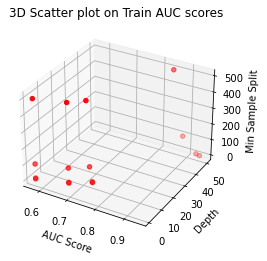

In [71]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1 = list(gs.cv_results_['mean_train_score'])

max_depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
min_samples_split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
ax.scatter(g1, max_depth, min_samples_split, c='r', marker='o')
ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()


## 3D Scatter Plot of cross-validation AUC

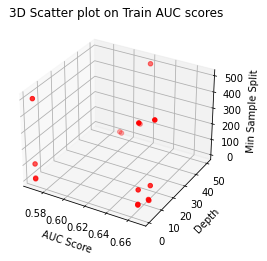

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1 = list(gs.cv_results_['mean_test_score'])

max_depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
min_samples_split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
ax.scatter(g1, max_depth, min_samples_split, c='r', marker='o')
ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()


### Heatmap for Train and CV AUC


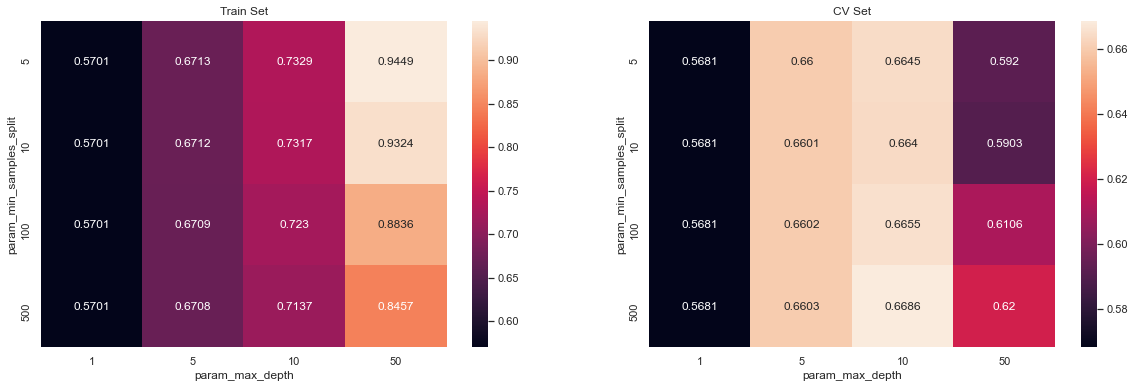

In [73]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [74]:
gs_results.best_params_


{'max_depth': 10, 'min_samples_split': 500}

In [75]:
max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']


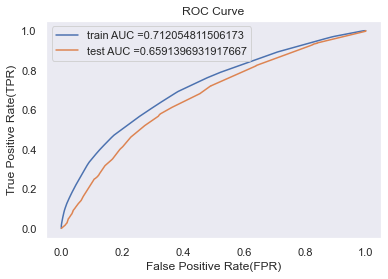

In [76]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_tr1,y_train)
y_train_pred =dtree.predict_proba(X_tr1 )[:, 1]   
y_test_pred =dtree.predict_proba(X_te1)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

## Confusion Matrix

In [77]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions1
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

In [78]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4294078559996144 for threshold 0.501
Train confusion matrix
[[ 7448  3635]
 [22424 39689]]
Test confusion matrix
[[ 3962  1497]
 [14679 15914]]


In [79]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

<AxesSubplot:>

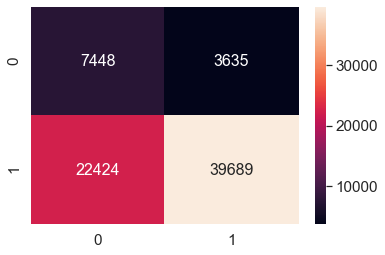

In [80]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [81]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

<AxesSubplot:>

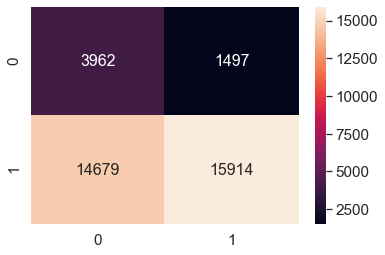

In [82]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary

   1. Decision tree works well  having test score of 0.71 auc
   2. Maximum depth choose to be 10 with minimum samples per spli as 500

### Word Cloud for False Positive word essays(from test data)


In [83]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (pd.DataFrame(y_test).values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])


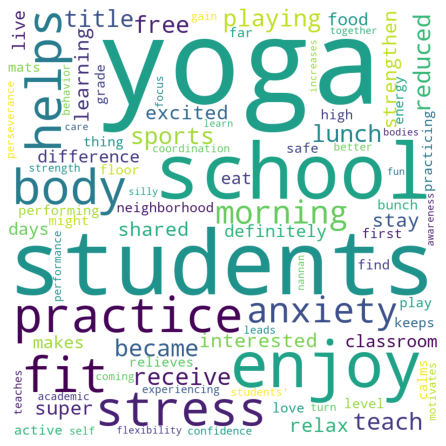

In [84]:
    # Word cloud of essay
    from wordcloud import WordCloud, STOPWORDS
    comment_words = ' '
    stopwords = set(STOPWORDS)
    for val in fp_essay1 :
        val = str(val)
        tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens :
        comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =stopwords,min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()



## Box Plots of price  predicted as false positve


In [85]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))


<AxesSubplot:ylabel='price'>

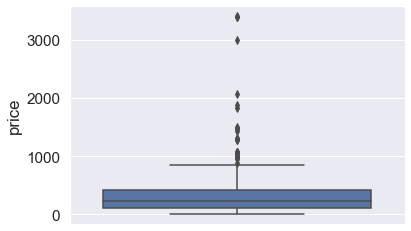

In [86]:
#Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)


### PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points


In [87]:
pdf_dataframe_teacher_number_of_previously_posted_projects = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [88]:
# keeping only those indices which are refered as the false positves and removing all other
pdf_dataframe_teacher_number_of_previously_posted_projects = pdf_dataframe_teacher_number_of_previously_posted_projects.iloc[fpi,:]


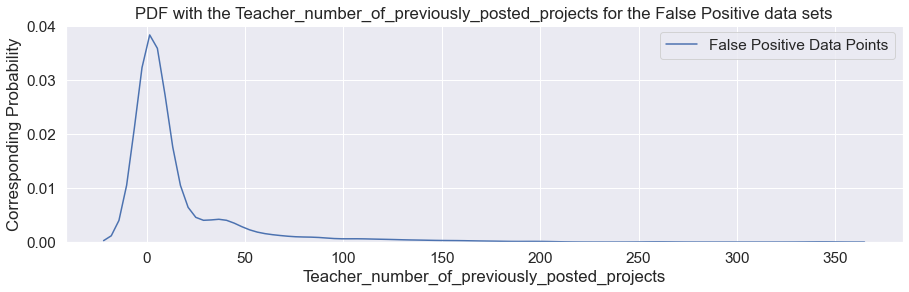

In [89]:
plt.figure(figsize=(15,4))
sns.distplot(pdf_dataframe_teacher_number_of_previously_posted_projects.values, hist=False, label="False Positive Data Points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data sets')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Corresponding Probability')
plt.legend()
plt.show()


## 3.2 SET 2

In [90]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((train_tfidf_w2v_essays,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std,essay_word_count_train)).tocsr()

X_te2= hstack((test_tfidf_w2v_essays,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std,essay_word_count_test)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)

print(X_te1.shape, y_test.shape)
print("="*100)
print("Final Data matrix")
print(X_tr2.shape, y_train.shape)

print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5103) (73196,)
(36052, 5103) (36052,)
Final Data matrix
(73196, 153) (73196,)
(36052, 153) (36052,)


In [91]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
gs = GridSearchCV(dtree, grid_params, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=10)
gs_results = gs.fit(X_tr2, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.4min finished


0.6623932011900527
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=500)
{'max_depth': 5, 'min_samples_split': 500}


In [92]:

#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])


Best score:  0.6623932011900527
k value with best score:  {'max_depth': 5, 'min_samples_split': 500}
Train AUC scores
[0.57013328 0.57013328 0.57013328 0.57013328 0.67801024 0.67801024
 0.67799197 0.67759276 0.79514401 0.79362043 0.7728591  0.73896192
 0.99982524 0.99750661 0.88144387 0.7581841 ]
CV AUC scores
[0.56811314 0.56811314 0.56811314 0.56811314 0.66207964 0.66207964
 0.66207964 0.6623932  0.64331856 0.64402148 0.64742017 0.65780835
 0.5374481  0.54429638 0.59891132 0.64908438]



## 3D Scatter plot of Train AUC

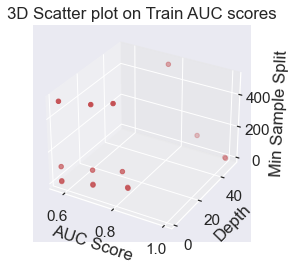

In [93]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1 = list(gs.cv_results_['mean_train_score'])

max_depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
min_samples_split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
ax.scatter(g1, max_depth, min_samples_split, c='r', marker='o')
ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()

## 3D Scatter Plot of cross-validation AUC

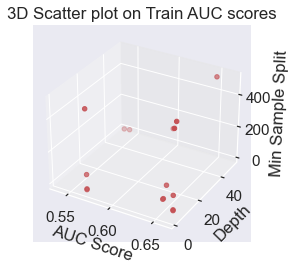

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1 = list(gs.cv_results_['mean_test_score'])

max_depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
min_samples_split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
ax.scatter(g1, max_depth, min_samples_split, c='r', marker='o')
ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()


### Heatmap for Train and CV AUC

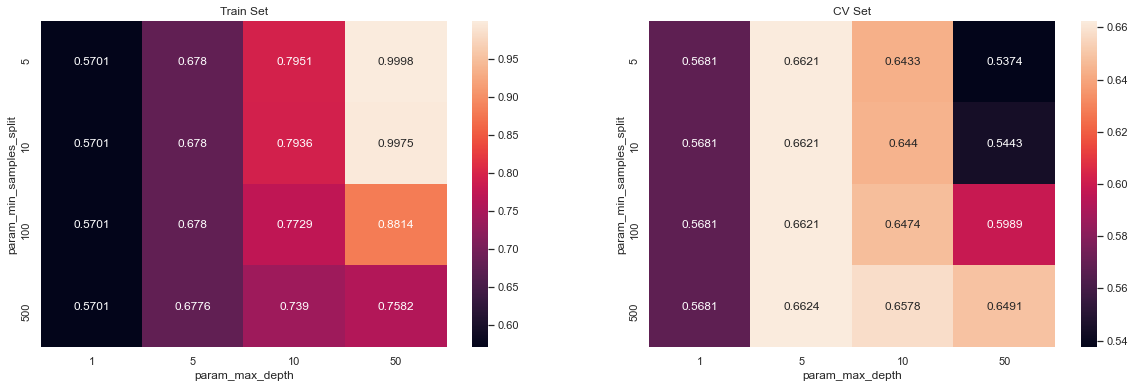

In [96]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [97]:

gs_results.best_params_


{'max_depth': 5, 'min_samples_split': 500}

In [98]:

max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']


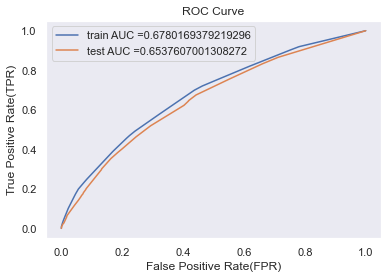

In [99]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_tr2,y_train)
y_train_pred =dtree.predict_proba(X_tr2 )[:, 1]   
y_test_pred =dtree.predict_proba(X_te2)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

## Confusion Matrix


In [100]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


the maximum value of tpr*(1-fpr) 0.39568391400875164 for threshold 0.514
Train confusion matrix
[[ 7035  4048]
 [23394 38719]]
Test confusion matrix
[[ 3858  1601]
 [14717 15876]]


In [101]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))


<AxesSubplot:>

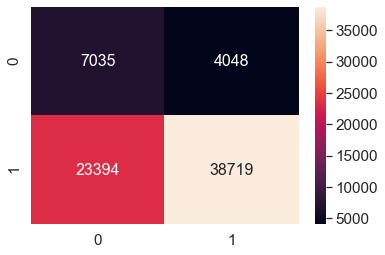

In [102]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [103]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

<AxesSubplot:>

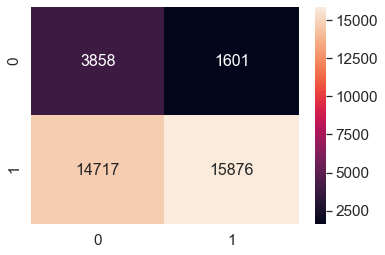

In [104]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary

1. Decision trees with text data encoded as tfidf w2v having a test score of .65
2. Maximum depth found to be 5 with minimum sample split of 500

### Word Cloud for False Positive word essays(from test data)

In [105]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (pd.DataFrame(y_test).values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

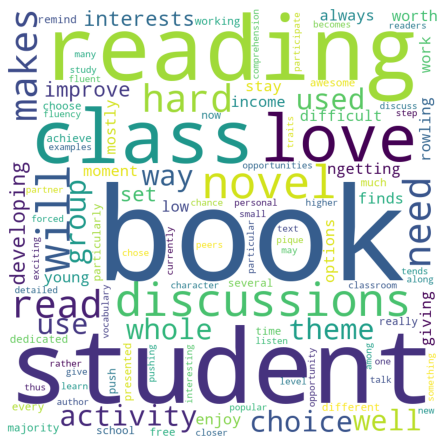

In [106]:
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
        val = str(val)
        tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
for words in tokens :
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



### Box plot for price predicted as false positives

In [107]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))


<AxesSubplot:ylabel='price'>

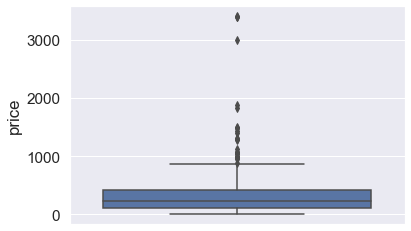

In [108]:
#Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)


### PDF with the Teacher_number_of_previously_posted_projects for the False Positive datapoints


In [109]:

pdf_dataframe_teacher_number_of_previously_posted_projects = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])
# keeping only those indices which are refered as the false positves and removing all other
pdf_dataframe_teacher_number_of_previously_posted_projects = pdf_dataframe_teacher_number_of_previously_posted_projects.iloc[fpi,:]

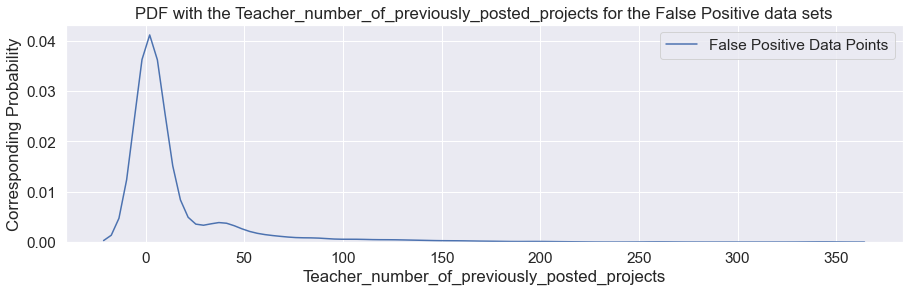

In [110]:
plt.figure(figsize=(15,4))
sns.distplot(pdf_dataframe_teacher_number_of_previously_posted_projects.values, hist=False, label="False Positive Data Points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data sets')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Corresponding Probability')
plt.legend()
plt.show()



## SET 3 (SET1 with non zero feature importance)

In [111]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr3 = hstack((X_train_essay_tfidf,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std,essay_word_count_train)).tocsr()

X_te3= hstack((X_test_essay_tfidf,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std,essay_word_count_test)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)

print(X_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5103) (73196,)
(36052, 5103) (36052,)


In [112]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=None,min_samples_leaf= 500,class_weight='balanced')
from sklearn.metrics import roc_curve, auc
dtree.fit(X_tr3, y_train)


DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=500)

In [113]:
feature_impce = dtree.feature_importances_
relevant_features = []
cols = []
for i, val in enumerate(feature_impce): #dtc2 is optimal decision tree model for set 2.
    if val > 0:
        relevant_features.append(feature_impce[i])
        cols.append(i)


In [115]:
X_tr3_new = X_tr3.todense()[:, cols]
X_te3_new = X_te3.todense()[:, cols]
print(X_tr3_new.shape)
print(X_te3_new.shape)

(73196, 26)
(36052, 26)


In [116]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
gs = GridSearchCV(dtree, grid_params, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=10)
gs_results = gs.fit(X_tr3_new, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   25.0s finished


0.6664180840941519
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)
{'max_depth': 10, 'min_samples_split': 500}


In [117]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.6664180840941519
k value with best score:  {'max_depth': 10, 'min_samples_split': 500}
Train AUC scores
[0.57013328 0.57013328 0.57013328 0.57013328 0.67012021 0.67012021
 0.66994945 0.66986306 0.73659865 0.73542592 0.72250231 0.70733998
 0.99669029 0.97940254 0.83324458 0.73686679]
CV AUC scores
[0.56811314 0.56811314 0.56811314 0.56811314 0.66094781 0.66094781
 0.66097167 0.66108555 0.65574618 0.6556167  0.6599341  0.66641808
 0.53701881 0.54603643 0.60649201 0.65442541]


## 3D Scatter plot of Train AUC

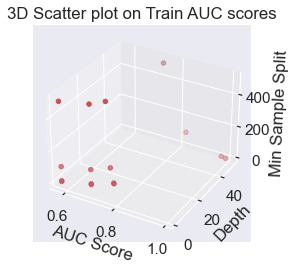

In [120]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1 = list(gs.cv_results_['mean_train_score'])
max_depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
min_samples_split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
ax.scatter(g1, max_depth, min_samples_split, c='r', marker='o')
ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()

## 3D Scatter Plot of cross-validation AUC

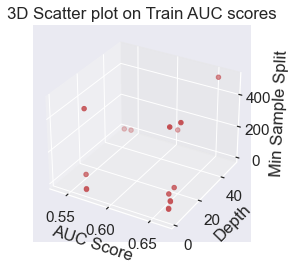

In [121]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1 = list(gs.cv_results_['mean_test_score'])
max_depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
min_samples_split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
ax.scatter(g1, max_depth, min_samples_split, c='r', marker='o')
ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()


### Heatmap for Train and CV AUC

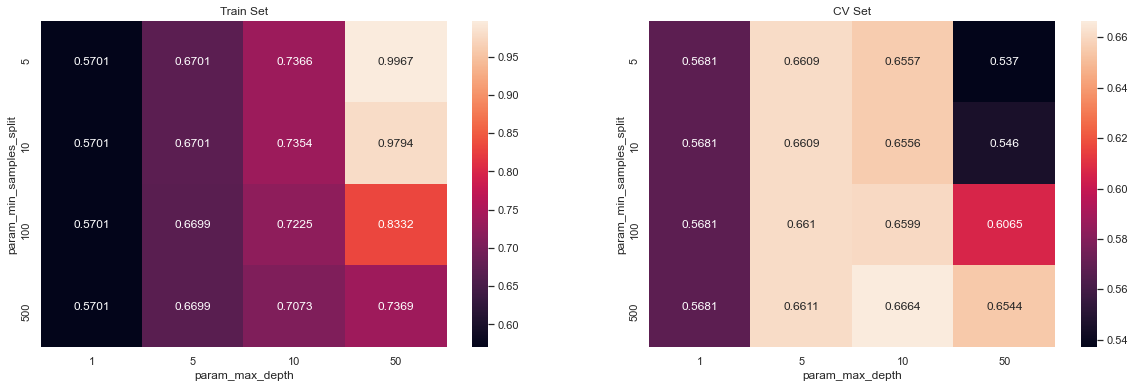

In [122]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [123]:
gs_results.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [124]:

max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']

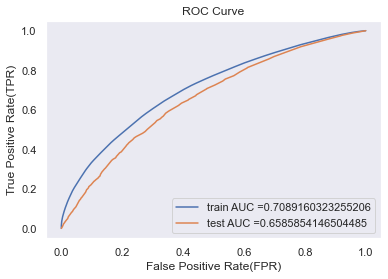

In [125]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_tr3_new ,y_train)
y_train_pred =dtree.predict_proba(X_tr3_new  )[:, 1]   
y_test_pred =dtree.predict_proba(X_te3_new)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()


## Confusion Matrix

In [126]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.42664365425532186 for threshold 0.501
Train confusion matrix
[[ 7360  3723]
 [22208 39905]]
Test confusion matrix
[[ 3773  1686]
 [14192 16401]]


In [127]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))


<AxesSubplot:>

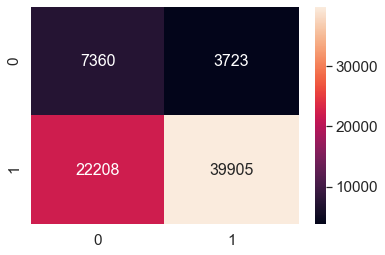

In [128]:

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [129]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

<AxesSubplot:>

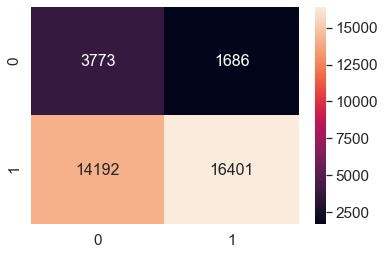

In [130]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')





### Word Cloud for False Positive word essays(from test data)

In [131]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (pd.DataFrame(y_test).values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

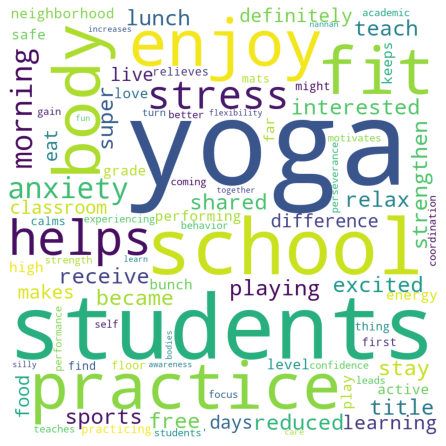

In [132]:
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
        val = str(val)
        tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
for words in tokens :
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



## Summary

1. Decision tree applied on set with non zero feature importance have test auc score of 0.66
2. Maximum depth  seems to be 10 with minimum samples split of 500

## CONCLUSION

In [1]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]


x.add_row(["TFIDF", "Decision Tree", [10,0.65], 0.65])
x.add_row(["TFIDF W2V", "Decision Tree",[5,500], 0.65])
x.add_row(["TFIDF with non zero Feature Importance", "Decision Tree", [10,500], 0.66])


print(x)

+----------------------------------------+---------------+-----------------+------+
|               Vectorizer               |     Model     | Hyper Parameter | AUC  |
+----------------------------------------+---------------+-----------------+------+
|                 TFIDF                  | Decision Tree |    [10, 0.65]   | 0.65 |
|               TFIDF W2V                | Decision Tree |     [5, 500]    | 0.65 |
| TFIDF with non zero Feature Importance | Decision Tree |    [10, 500]    | 0.66 |
+----------------------------------------+---------------+-----------------+------+
